# Assignment 4:

### Author :Omer Ozeren

## Introduction 

The data that I will be working comes from the Davis Southern Club. 

The data background can be found here: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

The data can be found here: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

Question : **What can you infer about the relationships between (1) the women, and (2) the social events?**  

### VIDEO
please click [here](https://www.youtube.com/watch?v=XvIAdqaVd14) for assignment video

## Load Data :

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/omerozeren/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# create G graph object
G = nx.davis_southern_women_graph()
print(nx.info(G))
print('\nGraph Diameter:', nx.diameter(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625

Graph Diameter: 4


### Is the graph Connected?

In [3]:
print(nx.is_connected(G))

True


### is the graph directed?

In [4]:
print(nx.is_directed(G))

False


### is the graph bipartite?

In [5]:
print(nx.is_bipartite(G))

True


### degree centrality

In [6]:
deg = nx.degree(G)
max(dict(deg).values())

14

In [7]:
# we have Women and Social Events
women = G.graph['top']
events = G.graph['bottom']
print('Women :'.upper())
print(women)
print('Events :'.upper())
print(events)

WOMEN :
['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
EVENTS :
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [8]:
# following instructions on creating the Biadjacency Matrix
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, events))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


## Plot : Each the women with each events

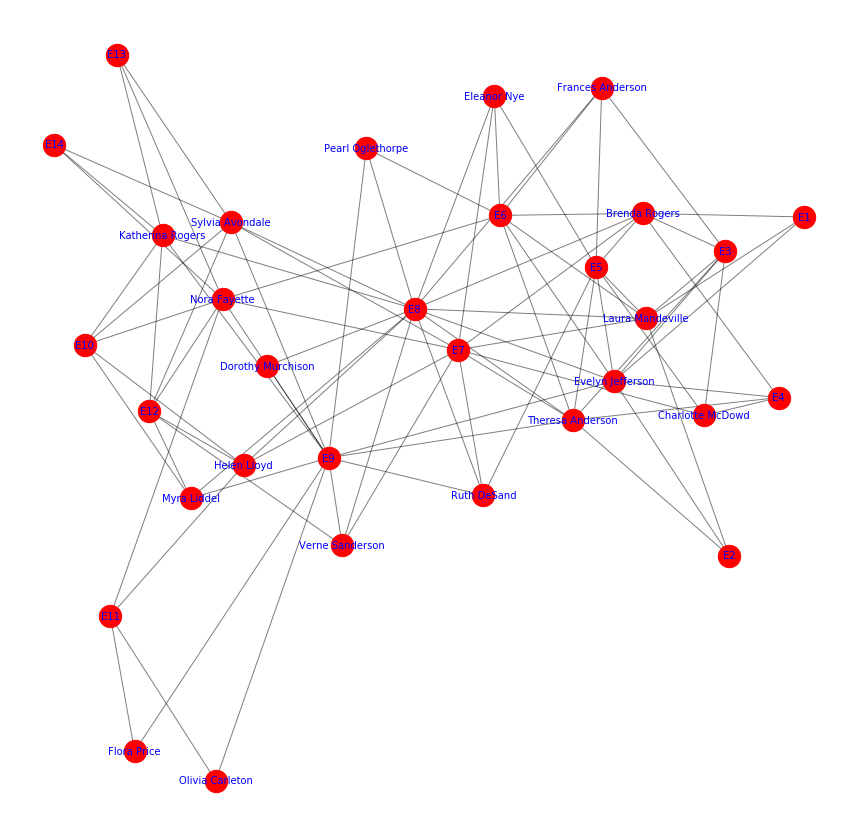

In [9]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="Black", alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="Red", node_size=500)
plt.axis("off")
plt.show()

**The bipartite graph of the overall network displays the events that the women enrolled in. I can verify some events have a high degree centraility such as E8 and E9.**

## Histogram : 

### Women

#### A chart that showing the number of events attended by each woman

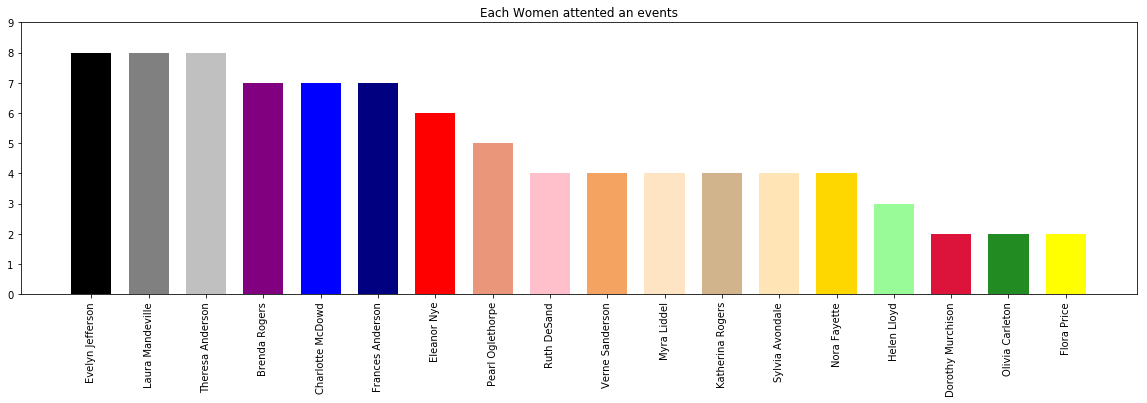

In [25]:
women_colors = dict()
for item in women:
    women_colors[item] = ["black", "gray", "silver", "purple", "blue", "navy",
                          "red", "darksalmon", "pink", "sandybrown", "bisque", "tan",
                          "moccasin", "gold", "palegreen", "crimson", "forestgreen", "yellow"][women.index(item)]
women_events = dict()
for w in women:
    women_events[w] = len(list(nx.all_neighbors(G, w)))
    
plt.figure(figsize = (20, 5))
plt.bar(women_events.keys(), sorted(women_events.values(),reverse=True), width = 0.7, align = "center", color = [women_colors[w] for w in women])
plt.xticks(rotation = 90)
plt.yticks(list(range(0, 10)))
plt.title("Each Women attented an events")

plt.axis("on")
plt.show()

**By looking at the histogram bar chart, Evelyn Jefferson,Nora Mandaville,Theresa attended most events and Dorothy Murchison, Olivia cartelon and Flora Price attended least number of events.**


#### The relationship between Women

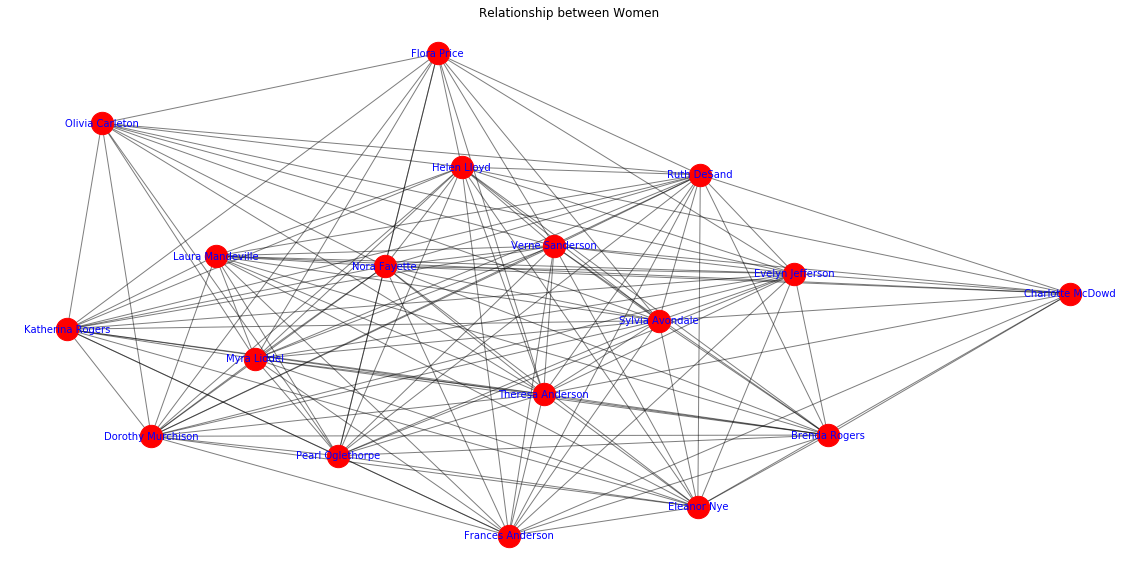

In [45]:
W = bipartite.projected_graph(G, women)
plt.figure(figsize=(20,10))
pos=nx.spring_layout(W,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(W, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W, pos, edge_color="Black", alpha=0.5)
nx.draw_networkx_nodes(W, pos, node_color="Red", node_size=500)
plt.axis("off")
plt.title("Relationship between Women")
plt.show()

**By looking the graph, we are able to visualize the relationship of each women. For example, Charlotte McDowd is fr iends with Evelyn Jefforson so on so forth.** 

#### Weighted projected graph for Women

In [51]:
W_weighted = bipartite.weighted_projected_graph(G, women)
[print('%d %s' % (W_weighted.degree(w, weight='weight'), w)) for w in women][0]

50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


**Evelyn has the highest weighted realationship.Flora has the lowest weighted relationship.**

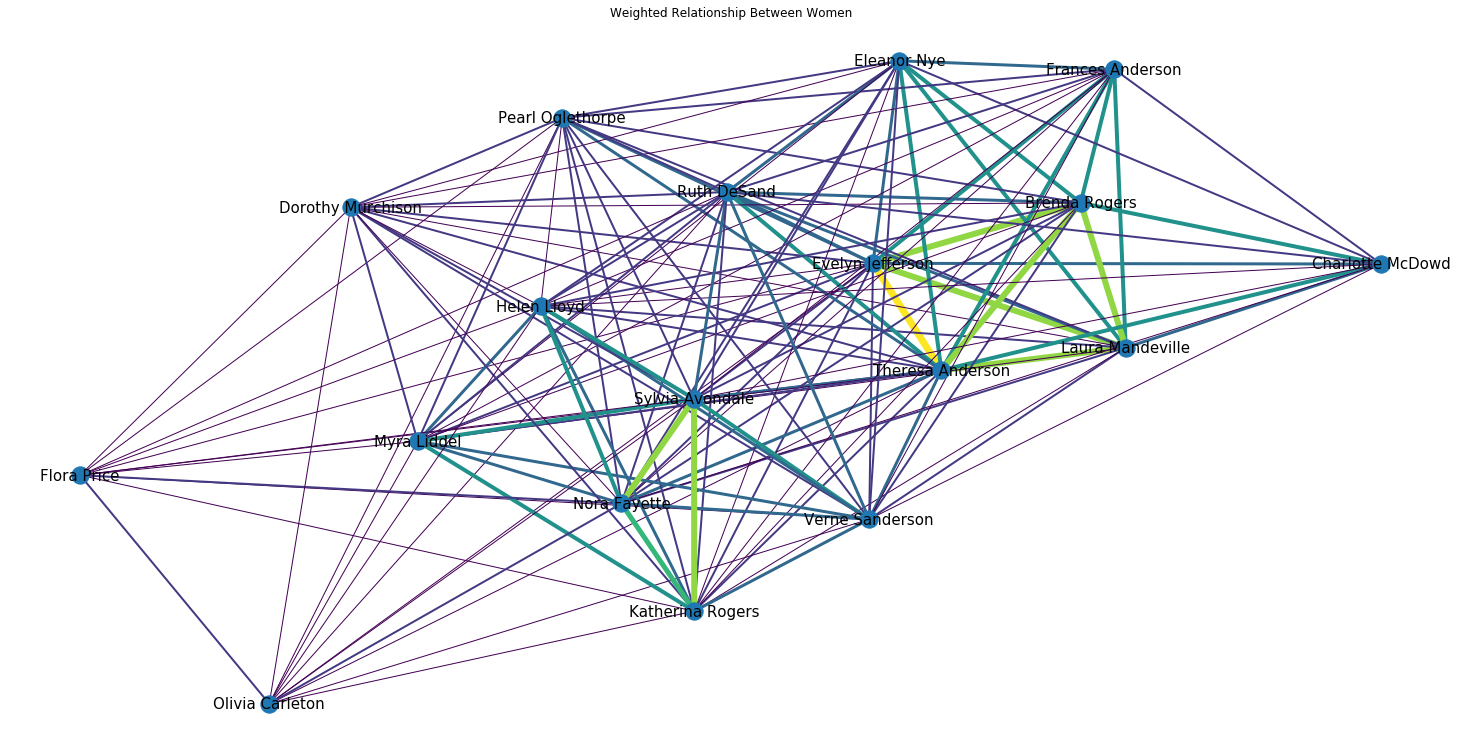

In [54]:
plt.figure(figsize=(20,10))
weight=[data['weight'] for t1,t2,data in W_weighted.edges(data=True)]
nx.draw(W_weighted, width=weight, edge_color=weight, with_labels=True, font_size=15)
plt.axis("off")
plt.title("Weighted Relationship Between Women")
plt.show()

**By look at the graph,I can see that lines with yellow and green indicate that the connection between (Evelyn ,Brenda,Laura and Verne) are really high.**

### Event :

#### A chart that showing the number of women in each event

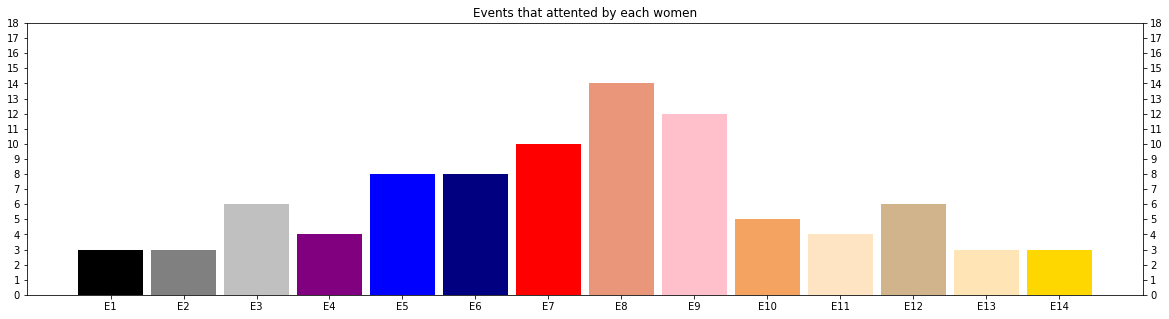

In [43]:

event_colors = dict()
for event in events:
    event_colors[event] = ["black", "gray", "silver", "purple", "blue", "navy",
                          "red", "darksalmon", "pink", "sandybrown", "bisque", "tan",
                          "moccasin", "gold", "palegreen", "crimson", "forestgreen", "yellow"][events.index(event)]
event_attendees = dict()
for item in events:
    event_attendees[item] = len(list(nx.all_neighbors(G, item)))

 
plt.figure(figsize = (20, 5))
plt.bar(event_attendees.keys(), event_attendees.values(), width = 0.9, align = "center", color = [event_colors[item] for item in events])
plt.yticks(list(range(0, 19)))
plt.tick_params(labelright = True, right = True)
plt.title("Events that attented by each women")

plt.axis("on")
plt.show()

**By looking at the histogram, events E8 and E9 were most attended and events E1, E14 were least attended.**

## The relationship between Events

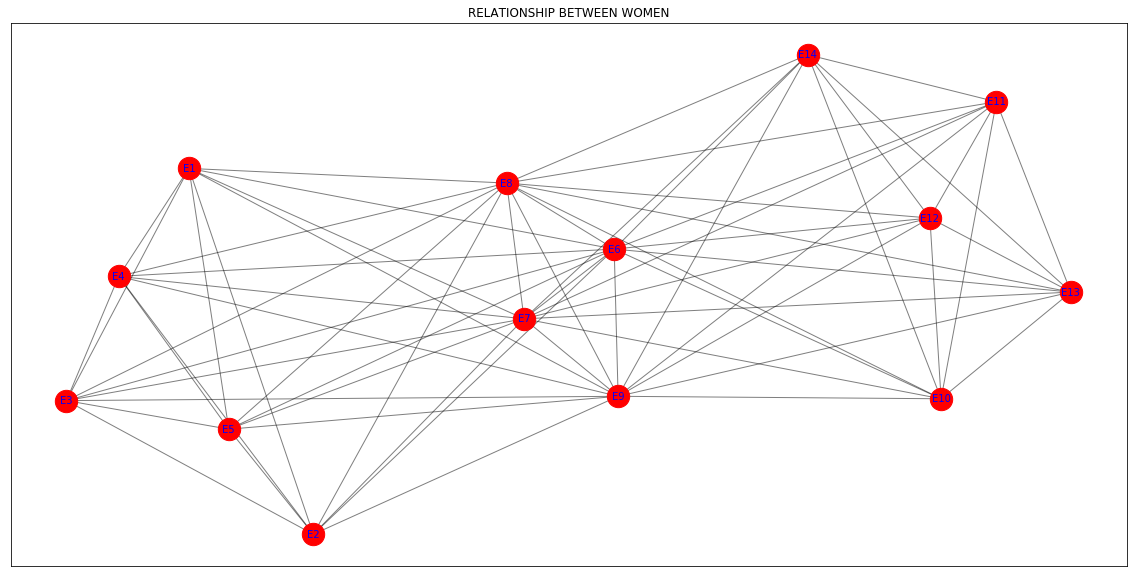

In [59]:
E = bipartite.projected_graph(G, events)
plt.figure(figsize=(20,10))
pos=nx.spring_layout(E,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(E, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(E, pos, edge_color="Black", alpha=0.5)
nx.draw_networkx_nodes(E, pos, node_color="Red", node_size=500)
plt.title("Relationship between Women".upper())
plt.show()

**The most popular event will have the most edges.So,With the above graph we can see E8 and E7 are at the center with most connected to the other events.**

#### Weighted projected graph for Events

In [56]:
E_weighted = bipartite.weighted_projected_graph(G, events)
[print('%d %s' % (E_weighted.degree(e, weight='weight'), e)) for e in events][0]

19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


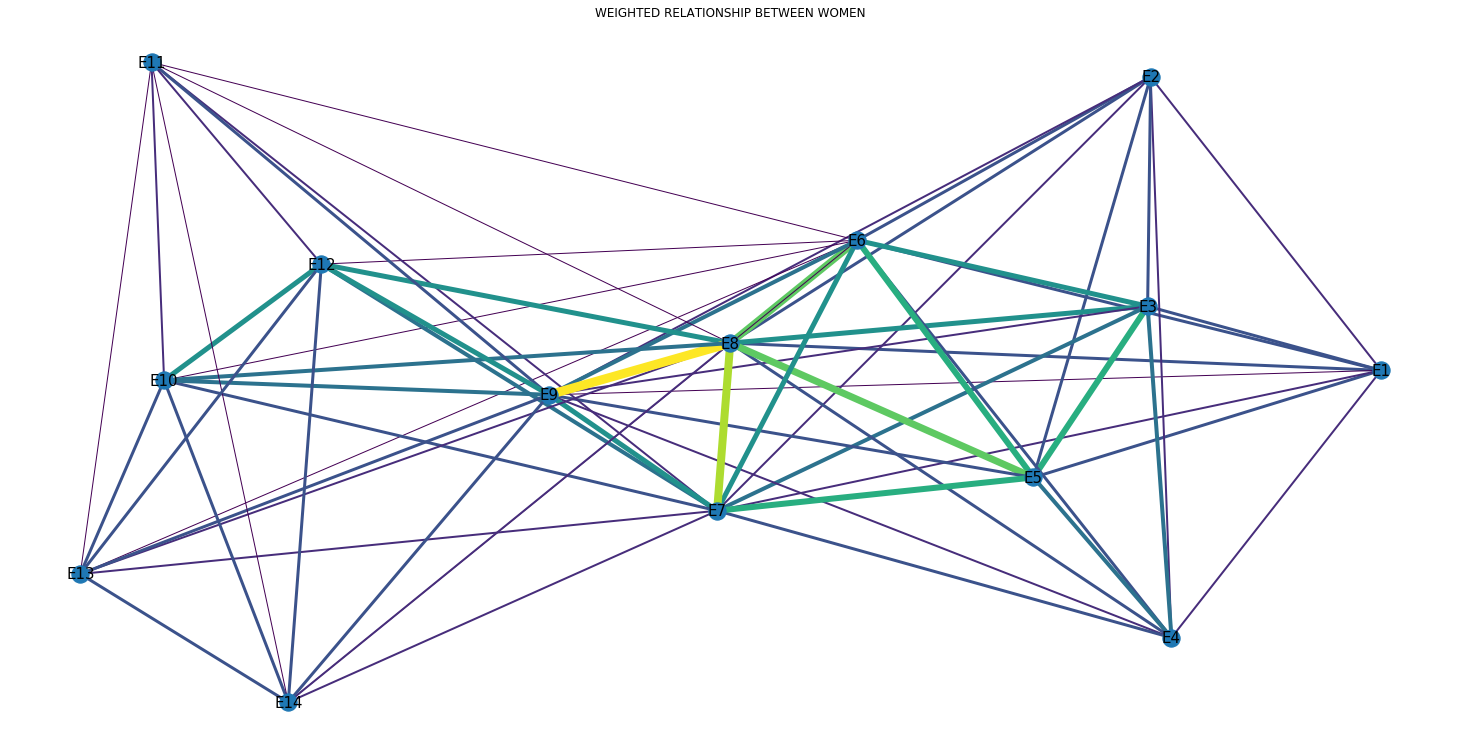

In [60]:
plt.figure(figsize=(20,10))
weight=[data['weight'] for t1,t2,data in E_weighted.edges(data=True)]
nx.draw(E_weighted, width=weight, edge_color=weight, with_labels=True, font_size=15)
plt.title("Weighted Relationship Between Women".upper())
plt.show()

**By looking at the graph,I can see how strong (Yellow and Green line connections are the strongest) each event is connected.**

## Conclusion


**By looking at my analysis and graphs above ,I can say that Evelyn Jefferson has the highest number of events and also she has the most connections .By looking at the analysis on events, E8 and E9 has the highest number of members.So, I can make an conclude that the more events a woman become a member the more connection she will have.**